# Classic Prediction Framework

* project : Liquidity
* author  : Daniel Yanan ZHOU (周亚楠)
* contact : adreambottle@outlook.com
* file    : main.py
* ide     : PyCharm
* time    : 2022-06-13


## 1. Classic Time Series and Prediction Methods in sklearn

```
"knn"     sklearn.neighbors.KNeighborsRegressor as Knn
"rf"      sklearn.ensemble.RandomForestClassifier
"ada"     sklearn.ensemble.AdaBoostRegressor
"gbrt"    sklearn.ensemble.GradientBoostingRegressor
"svr"     sklearn.svm.SVR
"lasso"   sklearn.linear_model.Lasso
"decision tree"  sklearn.tree.DecisionTreeRegressor
"linear"  sklearn.linear_model.LinearRegression
"ridge"   sklearn.linear_model.Ridge
```

In [1]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as Knn
import pandas as pd
import numpy as np
from itertools import product
from Toolkits import data_split

import warnings

warnings.filterwarnings('ignore')

# The model should be inside the list below
regression_model_list = ["knn", 
                         "rf", 
                         "ada", 
                         "gbrt", 
                         "svr", 
                         "lasso", 
                         "decision tree", 
                         "linear", "ridge", 
                         "enet"]

## 1.2. Funtions of Finding Candidate Parameter

* According to the the specification of parameter by sklearn, some parameter can be given
* List a parameter dictionary.
* The suitable parameter can be found in the dictionary accroding to the model name


In [2]:
# The function of 
def get_para(model_type, feature_num):

    svr_para_dict = [
        {"C": [0.1, 1, 10, 100], "kernel": ['linear'], "epsilon": [0.01, 0.05, 0.1, 0.5, 1]},
        {"C": [0.1, 1, 10, 100], "kernel": ['poly'], "degree": [2, 3, 4],
         "gamma": [1 / feature_num, 1e-2, 1e-3, 10], "epsilon": [0.01, 0.05, 0.1, 0.5, 1]},
        {"C": [0.1, 1, 10, 100], "kernel": ['rbf', 'sigmoid'], "gamma": [1 / feature_num, 1e-2, 1e-3, 10],
         "epsilon": [0.01, 0.05, 0.1, 0.5, 1]}
    ]

    gbdt_r_para_dict = [
        {"loss": ['ls', 'lad', 'huber', 'quantile'], "learning_rate": [0.01, 0.1, 1],
         "n_estimators": [20, 40, 60, 80, 100, 120, 140], "max_depth": [2, 3, 4],
         "min_samples_split": [2, 3, 4, 5], "min_samples_leaf": [1, 2, 3],"random_state":[42]}
    ]

    rf_r_para_dictt = [
        {"criterion": ["mse", "mae"], "n_estimators": [5, 10, 15, 20], "max_features": ['sqrt', None],
         "min_samples_split": [2, 3, 4], "min_samples_leaf": [1, 2, 3], "random_state": [42],
         "bootstrap":[False]}
    ]

    dt_r_pata_dict = [
        {"criterion": ["mse", "mae"], "min_samples_split": [2, 3, 4, 5], "min_samples_leaf": [1, 2, 3, 4],
         "random_state": [42]}
    ]

    knn_r_para_dict = [{"n_neighbors": [3, 4, 5, 6, 7, 8], "p": [1, 2], "weights": ["uniform", "distance"]}]

    ada_r_para_dict = [{"n_estimators": [10, 20, 30, 40, 50, 60, 70, 80], "learning_rate": [0.1, 0.5, 1.0, 1.5, 2.0],
                        "loss": ['linear', 'square', 'exponential'], "random_state": [42]}]

    lasso_para_dict = [{"alpha": [0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]}]

    linear_para_dict = [{"normalize": [True, False]}]

    ridge_para_dict = [{"alpha": [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5],"random_state": [42]}]

    enet_para_dict = [{"l1_ratio": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]


    if model_type == 'knn':
        return knn_r_para_dict
    elif model_type == 'rf':
        return rf_r_para_dictt
    elif model_type == 'ada':
        return ada_r_para_dict
    elif model_type == 'gbrt':
        return gbdt_r_para_dict
    elif model_type == 'svr':
        return svr_para_dict
    elif model_type == 'lasso':
        return lasso_para_dict
    elif model_type == 'decision tree':
        return dt_r_pata_dict
    elif model_type == 'linear':
        return linear_para_dict
    elif model_type == 'ridge':
        return ridge_para_dict
    elif model_type == 'enet':
        return enet_para_dict
    else:
        raise ValueError("The model in not in the model list, you can add a new one!")

    pass

## 1.2. Funtions of Initializing Models

* According to the model name, the model can be called from sklearn
* Initializing models by parameter input

In [3]:
def get_base_model(model_type, para=None):
    if model_type == 'knn':
        if para is None:
            model = Knn()
        else:
            model = Knn(**para)

    elif model_type == 'rf':
        if para is None:
            model = RandomForestRegressor(random_state=42, bootstrap=False)
        else:
            model = RandomForestRegressor(**para)

    elif model_type == 'ada':
        if para is None:
            model = AdaBoostRegressor(random_state=42)
        else:
            model = AdaBoostRegressor(**para)

    elif model_type == 'gbrt':
        if para is None:
            model = GradientBoostingRegressor(random_state=42)
        else:
            model = GradientBoostingRegressor(**para)

    elif model_type == 'svr':
        if para is None:
            model = SVR()
        else:
            model = SVR(**para)

    elif model_type == 'lasso':
        if para is None:
            model = Lasso()
        else:
            model = Lasso(**para)

    elif model_type == 'decision tree':
        if para is None:
            model = DecisionTreeRegressor(random_state=42)
        else:
            model = DecisionTreeRegressor(**para)

    elif model_type == 'linear':
        if para is None:
            model = LinearRegression()
        else:
            model = LinearRegression(**para)

    elif model_type == 'ridge':
        if para is None:
            model = Ridge(random_state=42)
        else:
            model = Ridge(**para)

    elif model_type == 'enet':
        if para is None:
            model = ElasticNet()
        else:
            model = ElasticNet(**para)
    else:
        raise ValueError("The model in not in the model list, you can add a new one!")
    return model

## 2. Data Process and Call Models
## 2.1. Funtions of Building Dataset

* Because this problem is a single series prediction
* We can use moving window to look back the recent history of the single series
* Build the dataset by spliting the data by the moving window

In [4]:
def build_dataset(data, look_back=5):
    series_l = {}
    series_X = []
    series_Y = []

    data_columns = data.columns
    for label in data_columns:
        # label = "V1"
        series = data[label].dropna()
        # series = data[label].dropna()

        series = np.array(series).reshape(-1, 1)
        series = series.astype('float32')

        series_l[label] = series
        # series_l.append(series)
        trainX, trainY, testX, testY = data_split(series,
                                                  look_back=look_back,
                                                  train_pct=1)
        series_X.append(trainX)
        series_Y.append(trainY)

    X_train = np.concatenate(series_X, axis=0).squeeze()
    Y_train = np.concatenate(series_Y, axis=0)
    return X_train, Y_train

## 2.2. Funtions of Prediction

* Predict the data by fitted model

In [5]:
def predict(model, pred_data, look_back=5):
    series_r = {}
    for label in pred_data:
        ser = pred_data[label]
        ser = np.array(ser)
        ser.astype('float32')
        ser = ser.flatten()
        for _ in range(8):
            series_new = ser[-look_back:]
            # print(f"label {label}, item {_}, {series_new}")
            pred_value = model.predict(series_new.reshape(1, -1))
            ser = np.append(ser, pred_value)

        # inverse_transform to get the original value
        ser_predict = ser.flatten()
        series_r[label] = ser_predict
    result_data = pd.DataFrame(series_r)
    return result_data

## 2.3. Load Data and Create DataSet

* Predict the data by fitted model

In [6]:
# using data have been cleaned

data_org = pd.read_csv("Cohorts_rev.csv")
data_org.columns = ["Date"] + ["V1", "V2", "V3", "V4"]
data_org["Date"] = pd.to_datetime(data_org["Date"], format="%b-%y")
org_columns = list(data_org.columns)

data_use = pd.read_csv("data_use.csv")
data = data_use[["V1", "V2", "V3", "V4"]]
date_index = data_use["Date"]
LOOK_BACK = 5

In [7]:
# Create the train dataset
X_train, Y_train = build_dataset(data=data, look_back=5)

print(f"This is X_train: {X_train.shape}\n")
print(X_train)
print(f"\n\nThis is Y_train: {Y_train.shape}\n")
print(Y_train)

This is X_train: (30, 5)

[[0.7924528  0.5        1.0476191  0.8636364  0.94736844]
 [0.5        1.0476191  0.8636364  0.94736844 0.9444444 ]
 [1.0476191  0.8636364  0.94736844 0.9444444  0.47058824]
 [0.8636364  0.94736844 0.9444444  0.47058824 1.225     ]
 [0.94736844 0.9444444  0.47058824 1.225      0.5510204 ]
 [0.9444444  0.47058824 1.225      0.5510204  0.7407407 ]
 [0.47058824 1.225      0.5510204  0.7407407  0.575     ]
 [1.225      0.5510204  0.7407407  0.575      0.47826087]
 [0.5510204  0.7407407  0.575      0.47826087 0.86036366]
 [0.85714287 0.9047619  0.57894737 0.8590909  0.52910054]
 [0.9047619  0.57894737 0.8590909  0.52910054 0.85      ]
 [0.57894737 0.8590909  0.52910054 0.85       0.88941175]
 [0.8590909  0.52910054 0.85       0.88941175 0.85978836]
 [0.52910054 0.85       0.88941175 0.85978836 0.84615386]
 [0.85       0.88941175 0.85978836 0.84615386 0.76363635]
 [0.88941175 0.85978836 0.84615386 0.76363635 0.7619048 ]
 [0.85978836 0.84615386 0.76363635 0.7619048  

## 3.1. Example1: KNN Regressor

* Predict the data by KNN Regressor

In [8]:
# Take KNN as an example
model_type = "knn"
para_dict = get_para(model_type, 1)[0]
para_permuatabtion = [para_dict[key] for key in para_dict]

para_set = []
for sample in product(*para_permuatabtion):
    para_sample = {}
    for (i, key) in enumerate(para_dict):
        para_sample[key] = sample[i]
    para_set.append(para_sample)

print(f"Number of the parameter combinations {len(para_set)}")

for para_sample in para_set:
    print(para_sample)

Number of the parameter combinations 24
{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
{'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
{'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
{'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
{'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}
{'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
{'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}
{'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
{'n_neighbors': 7, '

In [9]:
result_data_list = []
for i, para_sample in enumerate(para_set):

    model = get_base_model(model_type, para_sample)
    model.fit(X_train, Y_train)
    result_data = predict(model, data, LOOK_BACK)
    result_data_list.append(result_data)

In [10]:
# View one verion of the predicted result    
result_data_list[0]

,V1,V2,V3,V4
0,NaN,NaN,NaN,NaN
1,0.792453,NaN,NaN,NaN
2,0.500000,0.857143,NaN,NaN
3,1.047619,0.904762,0.711864,NaN
4,0.863636,0.578947,0.714286,0.843373
5,0.947368,0.859091,0.500000,0.833333
6,0.944444,0.529101,0.666667,0.600000
7,0.470588,0.850000,0.950000,0.714286
8,1.225000,0.889412,0.947368,0.600000
9,0.551020,0.859788,0.555556,0.834667


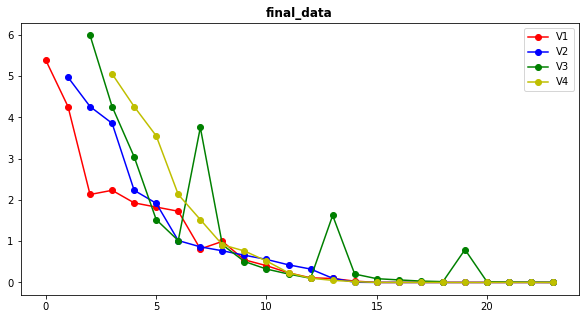

In [11]:
### Use the data forecasted by LSTM using keras
from Toolkits import plot_data, recover
import json

recover_data = {}
result_data = result_data_list[0]
for label in result_data.columns:
    # The start value is the last valid data in the original data on 2021-04-01
    start_value = np.array(data_org[label].dropna())[-1]

    # We only use the data after 2021-04-01, the last 8 data
    ser_before = result_data[label][-8:]

    # recover the original data from the division data
    ser_after = recover(ser_before, start_value, "Div")

    # remove the first original value
    recover_data[label] = ser_after[1:]
# Concat the original data and the predicted data together
recover_data["Date"] = [pd.to_datetime(f"2021-{month}") for month in range(5, 13)]
recover_frame = pd.DataFrame(recover_data)
final_data = pd.concat([data_org, recover_frame])
final_data.reset_index(drop=True, inplace=True)

# Add the seasonality for V3
decompose_dict = json.load(open("decompose_dict.json"))
final_data["V3"][19] = final_data["V3"][19] + decompose_dict["19"]["seasonality"]

# final_data.columns = org_columns
plot_data(final_data, "final_data")

In [12]:
final_data

,Date,V1,V2,V3,V4
0,2020-01-01,5.381984,NaN,NaN,NaN
1,2020-02-01,4.264969,4.975797e+00,NaN,NaN
2,2020-03-01,2.132484,4.264969e+00,5.991266,NaN
3,2020-04-01,2.234031,3.858781e+00,4.264969,5.057034e+00
4,2020-05-01,1.929391,2.234031e+00,3.046406,4.264969e+00
5,2020-06-01,1.827844,1.919236e+00,1.523203,3.554141e+00
6,2020-07-01,1.726297,1.015469e+00,1.015469,2.132484e+00
7,2020-08-01,0.812375,8.631485e-01,3.757234,1.523203e+00
8,2020-09-01,0.995159,7.676944e-01,0.913922,9.139219e-01
9,2020-10-01,0.548353,6.600547e-01,0.507734,7.628201e-01


## 3.2. Example2: Decision Tree Regressor

* Predict the data by decision tree Regressor

In [13]:
# Take decision tree as an example
model_type = "decision tree"
para_dict = get_para(model_type, 1)[0]
para_permuatabtion = [para_dict[key] for key in para_dict]

para_set = []
for sample in product(*para_permuatabtion):
    para_sample = {}
    for (i, key) in enumerate(para_dict):
        para_sample[key] = sample[i]
    para_set.append(para_sample)

print(f"Number of the parameter combinations {len(para_set)}")

for para_sample in para_set:
    print(para_sample)

Number of the parameter combinations 32
{'criterion': 'mse', 'min_samples_split': 2, 'min_samples_leaf': 1, 'random_state': 42}
{'criterion': 'mse', 'min_samples_split': 2, 'min_samples_leaf': 2, 'random_state': 42}
{'criterion': 'mse', 'min_samples_split': 2, 'min_samples_leaf': 3, 'random_state': 42}
{'criterion': 'mse', 'min_samples_split': 2, 'min_samples_leaf': 4, 'random_state': 42}
{'criterion': 'mse', 'min_samples_split': 3, 'min_samples_leaf': 1, 'random_state': 42}
{'criterion': 'mse', 'min_samples_split': 3, 'min_samples_leaf': 2, 'random_state': 42}
{'criterion': 'mse', 'min_samples_split': 3, 'min_samples_leaf': 3, 'random_state': 42}
{'criterion': 'mse', 'min_samples_split': 3, 'min_samples_leaf': 4, 'random_state': 42}
{'criterion': 'mse', 'min_samples_split': 4, 'min_samples_leaf': 1, 'random_state': 42}
{'criterion': 'mse', 'min_samples_split': 4, 'min_samples_leaf': 2, 'random_state': 42}
{'criterion': 'mse', 'min_samples_split': 4, 'min_samples_leaf': 3, 'random_stat

In [14]:
result_data_list = []
for i, para_sample in enumerate(para_set):

    model = get_base_model(model_type, para_sample)
    model.fit(X_train, Y_train)
    result_data = predict(model, data, LOOK_BACK)
    result_data_list.append(result_data)

In [15]:
# View one verion of the predicted result    
result_data_list[0]

,V1,V2,V3,V4
0,NaN,NaN,NaN,NaN
1,0.792453,NaN,NaN,NaN
2,0.500000,0.857143,NaN,NaN
3,1.047619,0.904762,0.711864,NaN
4,0.863636,0.578947,0.714286,0.843373
5,0.947368,0.859091,0.500000,0.833333
6,0.944444,0.529101,0.666667,0.600000
7,0.470588,0.850000,0.950000,0.714286
8,1.225000,0.889412,0.947368,0.600000
9,0.551020,0.859788,0.555556,0.834667


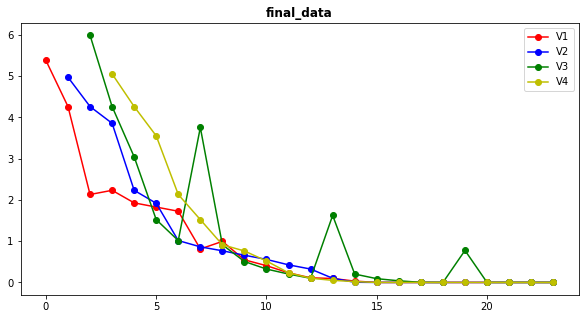

In [16]:
recover_data = {}
result_data = result_data_list[0]
for label in result_data.columns:
    # The start value is the last valid data in the original data on 2021-04-01
    start_value = np.array(data_org[label].dropna())[-1]

    # We only use the data after 2021-04-01, the last 8 data
    ser_before = result_data[label][-8:]

    # recover the original data from the division data
    ser_after = recover(ser_before, start_value, "Div")

    # remove the first original value
    recover_data[label] = ser_after[1:]
# Concat the original data and the predicted data together
recover_data["Date"] = [pd.to_datetime(f"2021-{month}") for month in range(5, 13)]
recover_frame = pd.DataFrame(recover_data)
final_data = pd.concat([data_org, recover_frame])
final_data.reset_index(drop=True, inplace=True)

# Add the seasonality for V3
decompose_dict = json.load(open("decompose_dict.json"))
final_data["V3"][19] = final_data["V3"][19] + decompose_dict["19"]["seasonality"]

# final_data.columns = org_columns
plot_data(final_data, "final_data")

In [17]:
final_data

,Date,V1,V2,V3,V4
0,2020-01-01,5.381984,NaN,NaN,NaN
1,2020-02-01,4.264969,4.975797,NaN,NaN
2,2020-03-01,2.132484,4.264969,5.991266,NaN
3,2020-04-01,2.234031,3.858781,4.264969,5.057034
4,2020-05-01,1.929391,2.234031,3.046406,4.264969
5,2020-06-01,1.827844,1.919236,1.523203,3.554141
6,2020-07-01,1.726297,1.015469,1.015469,2.132484
7,2020-08-01,0.812375,0.863148,3.757234,1.523203
8,2020-09-01,0.995159,0.767694,0.913922,0.913922
9,2020-10-01,0.548353,0.660055,0.507734,0.762820
